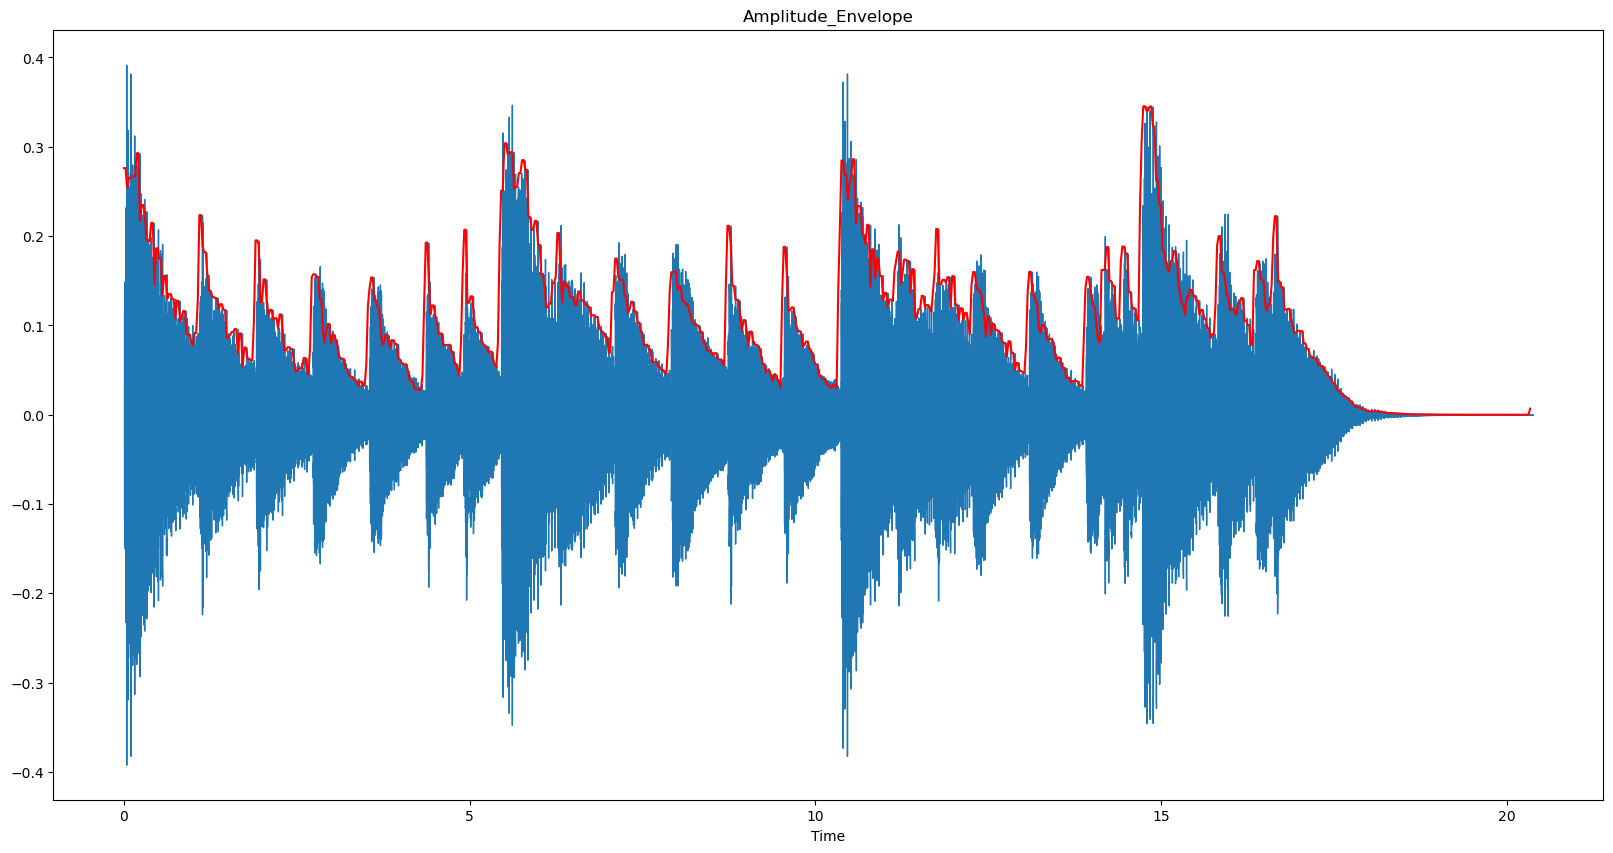

Congratulation!you finish it!


In [2]:
""" 提取信号的幅值包络
# 0.预设环境 下载语音库librosa 数组处理库nunpy
# 1. 加载信号 librosa.load()
# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
# 最值的获取方式：max(waveform[t*(frame_size-hop_size):t*frame_size])
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4. 绘制信号的幅值包络信息
"""
# 0.预设环境 下载语音库librosa 数组处理库nunpy
import librosa
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
# 1. 加载信号 librosa.load()
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
wave_path_relative = "audio_data/music_piano.wav"
waveform, sample_rate = librosa.load(wave_path, sr=None)

# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
def Calc_Amplitude_Envelope(waveform,frame_length,hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform)-frame_length)/hop_length) + 1
        pad_num = frame_num*hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform,pad_width=(0,pad_num),mode="wrap")
    frame_num = int((len(waveform)-frame_length)/hop_length) + 1
    waveform_ae = []
    for t in range(frame_num):
        current_frame = waveform[t*(frame_length-hop_length):t*(frame_length-hop_length)+frame_length]
        current_ae = max(current_frame)
        waveform_ae.append(current_ae)
    return np.array(waveform_ae)
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(frame_size*0.5)
waveform_AE = Calc_Amplitude_Envelope(waveform=waveform,frame_length=frame_size,hop_length=hop_size)
# 4. 绘制信号的幅值包络信息
frame_scale = np.arange(0,len(waveform_AE))
time_scale = librosa.frames_to_time(frame_scale,hop_length=hop_size)
plt.figure(figsize=(20,10))
librosa.display.waveshow(waveform)
plt.plot(time_scale,waveform_AE,color="r")
plt.title("Amplitude_Envelope")
plt.show()
print("Congratulation!you finish it!")